# DM Project1
#### l630003061
#### Zhongyi Yu

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
import scipy
import math
import matplotlib.image as mpimg

---
## Q1-1.1, Q1-1.2
##### 1,2,3-D random numbers with visualization

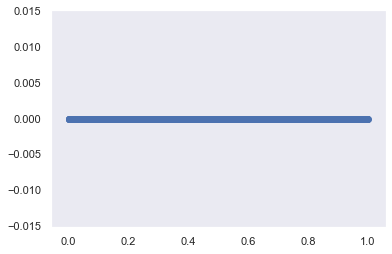

In [91]:
# 1-D random numbers with visualization
rand_1d = np.random.rand(1000, 1)
plt.scatter(rand_1d[:,0], [0 for _ in range(1000)])
plt.show()

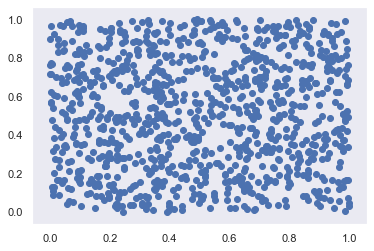

In [92]:
# Q1-1.1, Q1-1.2
# 2-D random numbers with visualization
rand_2d = np.random.rand(1000, 2)
plt.scatter(rand_2d[:,0], rand_2d[:,1])
plt.show()

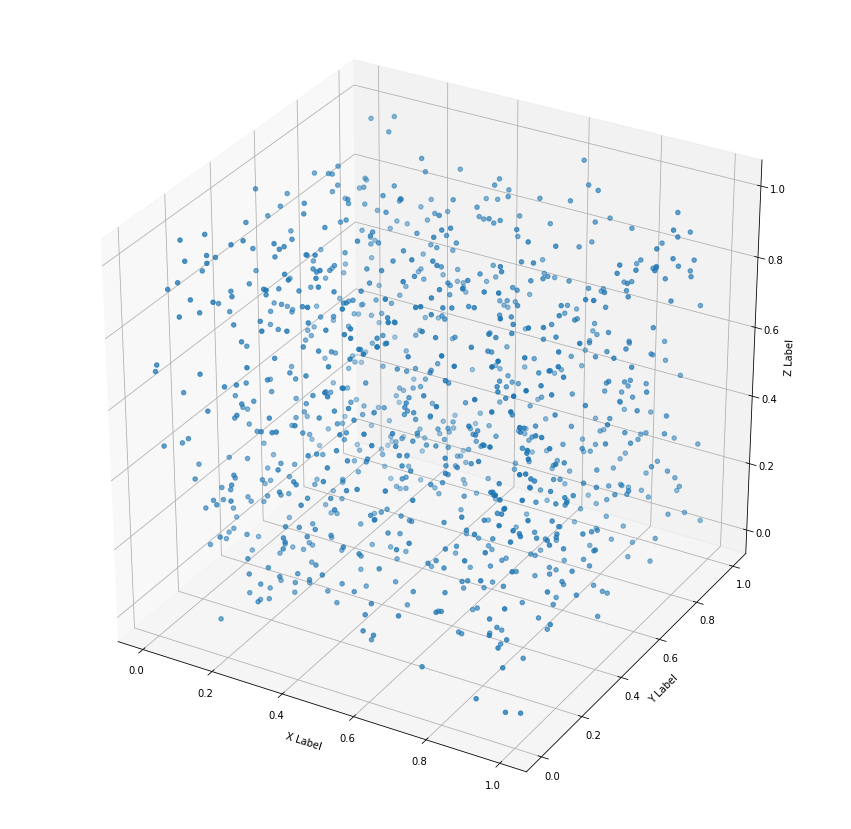

In [5]:
# Q1-1.1, Q1-1.2
# 3-D random numbers with visualization
from mpl_toolkits.mplot3d import Axes3D

rand_3d = np.random.rand(1000,3)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rand_3d[:,0], rand_3d[:,1], rand_3d[:,2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

---
## Q1-1.3 
##### pdfs

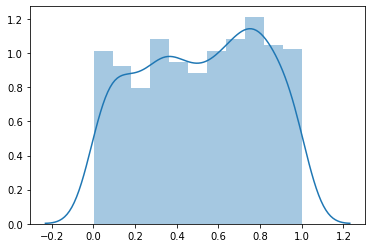

In [16]:
# Q1-1.3 
# pdf of 1-d
sns.distplot(rand_1d)
plt.show()

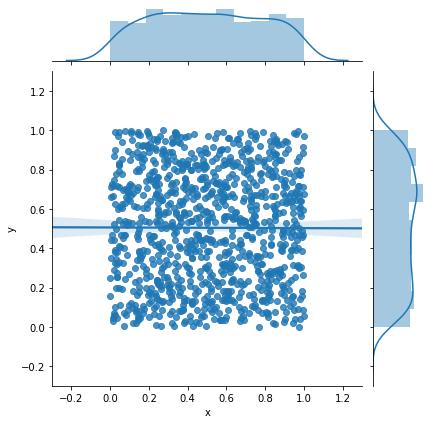

In [26]:
# Q1-1.3 
# pdf of 2-d
df = pd.DataFrame(rand_2d, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df, kind='regress')
plt.show()

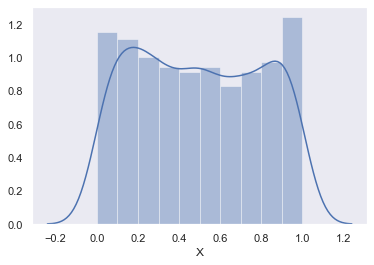

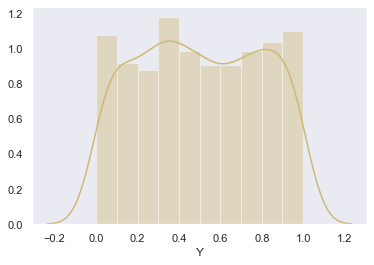

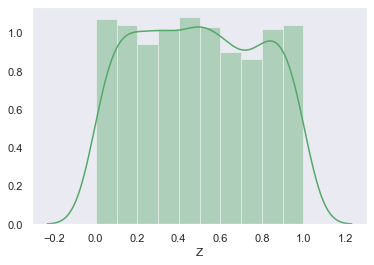

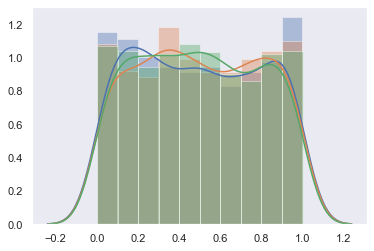

In [89]:
# Q1-1.3 
# pdf of 3-d

sns.distplot(rand_3d[:,0], norm_hist=True, axlabel='X')
plt.show()
sns.distplot(rand_3d[:,1], norm_hist=True, axlabel = 'Y', color="y")
plt.show()
sns.distplot(rand_3d[:,2], norm_hist=True, axlabel = 'Z', color='g')
plt.show()

sns.distplot(rand_3d[:,0], norm_hist=True)
sns.distplot(rand_3d[:,1], norm_hist=True)
sns.distplot(rand_3d[:,2], norm_hist=True)
plt.show()

---
## Q1-1.4 

### These sampes are uniformly distributed. This is because ```np.random.rand()``` generate number from uniform distribution. pdf's doesn't exactly fit a standard uniform distribution because the sample size is not big enough, if we sample more and more points, the data distribution should be a standard uniform distribution.

---
## Q1-2.1 

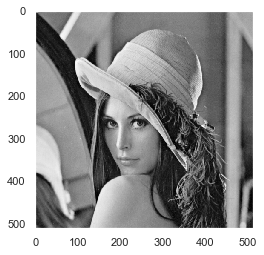

In [102]:
image = mpimg.imread('lenna.jpeg')
plt.imshow(image, cmap='gray')
plt.show()

---
## Q1-2.2 

In [119]:
# display image shape here:
print('image shape:', image.shape)

# flatten:
flat = image.reshape(1, -1)
print('After flat:', flat.shape)

mean = np.mean(flat)
median = np.median(flat)
min_value = np.min(flat)
max_value = np.max(flat)
mode = scipy.stats.mode(flat, axis=None)

print('mean:', mean)
print('median:', median)
print('min:', min_value)
print('max:', max_value)
print('mode:', *mode[0], 'count:', *mode[-1])

image shape: (512, 512)
After flat: (1, 262144)
mean: 117.9999885559082
median: 125.0
min: 0
max: 251
mode: 154 count: 2320


---
## Q1-2.3 
#### could change the view angle by chaning parameters in ```ax.view_init(c1, c2)```

(262144,) (262144,) (1, 262144)


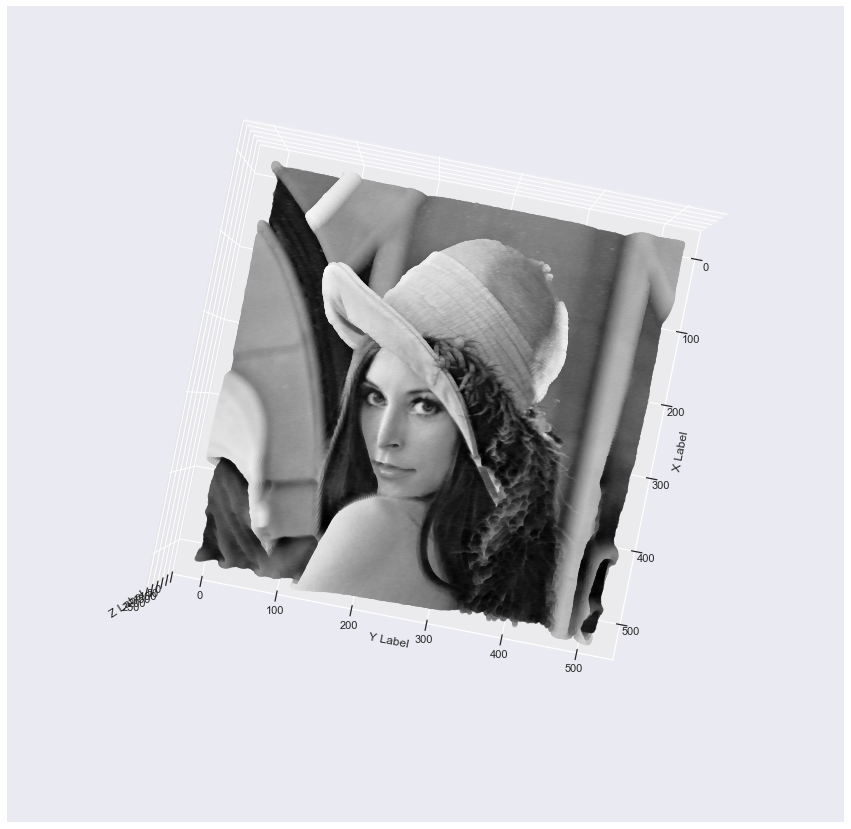

In [191]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

# Change the angle here:
ax.view_init(90, 10)

x = np.repeat(np.array([i for i in range(512)]), 512)
y = np.array([i for i in range(512)])
y = np.tile(y, 512)

ax.scatter(x, y, flat, marker='o', c = flat[0], cmap='gray')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

---
## Q1-2.4 
#### could change the view angle by chaning parameters in ```ax.view_init(c1, c2)```

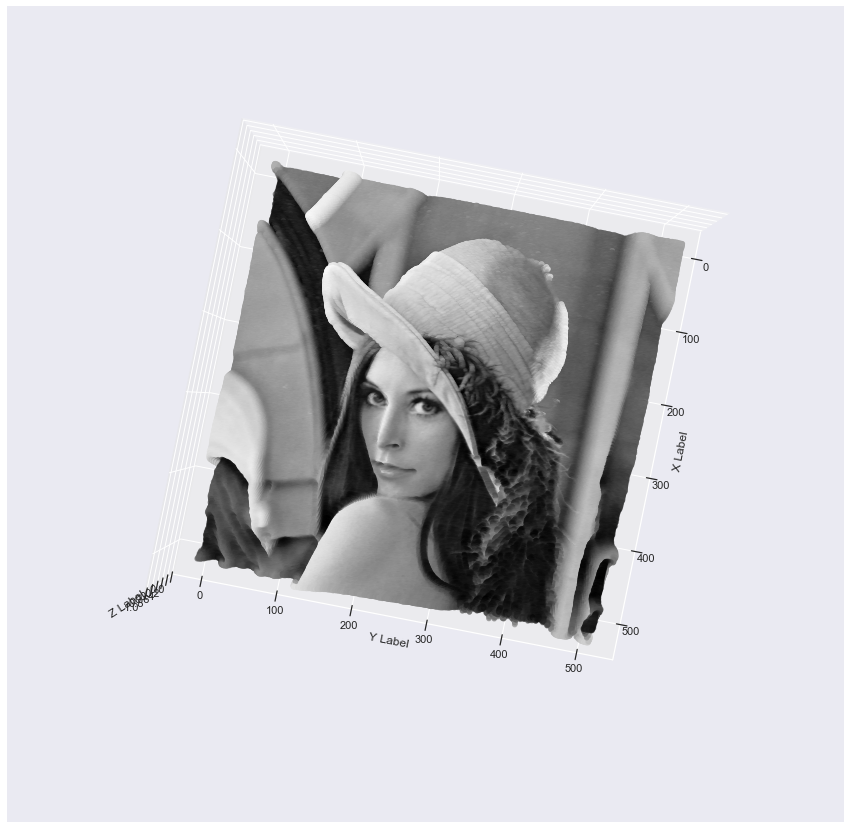

In [196]:
# Perform min-max normalization
min_max_norm_flat = (flat - np.min(flat)) / (np.max(flat) - np.min(flat))

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

# Change the view angle here:
ax.view_init(90, 10)

x = np.repeat(np.array([i for i in range(512)]), 512)
y = np.array([i for i in range(512)])
y = np.tile(y, 512)

ax.scatter(x, y, min_max_norm_flat, marker='o', c = min_max_norm_flat[0], cmap='gray')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

---
## Q1-3-1
#### Partition image intensity into 2 bins, i.e., change the image to 1 bit image (binary image)


In [231]:
def plot_bin_image(bins_num):
    print('Number of bins:', bins_num)
    min_max_norm_flat = (flat - np.min(flat)) / (np.max(flat) - np.min(flat))

    bins = [i / bins_num for i in range(bins_num)]
    result = (np.histogram(min_max_norm_flat, bins, weights=min_max_norm_flat)[0] /
                 np.histogram(min_max_norm_flat, bins)[0])

    for i in range(1, len(min_max_norm_flat[-1])):
        for j in range(len(bins)):
            if min_max_norm_flat[0][i] >= bins[j-1] and min_max_norm_flat[0][i] < bins[j]:
                min_max_norm_flat[0][i] = bins[j-1]
            else:
                continue

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')

    # Change the view angle here:
    ax.view_init(90, 10)

    x = np.repeat(np.array([i for i in range(512)]), 512)
    y = np.array([i for i in range(512)])
    y = np.tile(y, 512)

    ax.scatter(x, y, min_max_norm_flat, marker='o', c = min_max_norm_flat[0], cmap='gray')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

Number of bins: 2


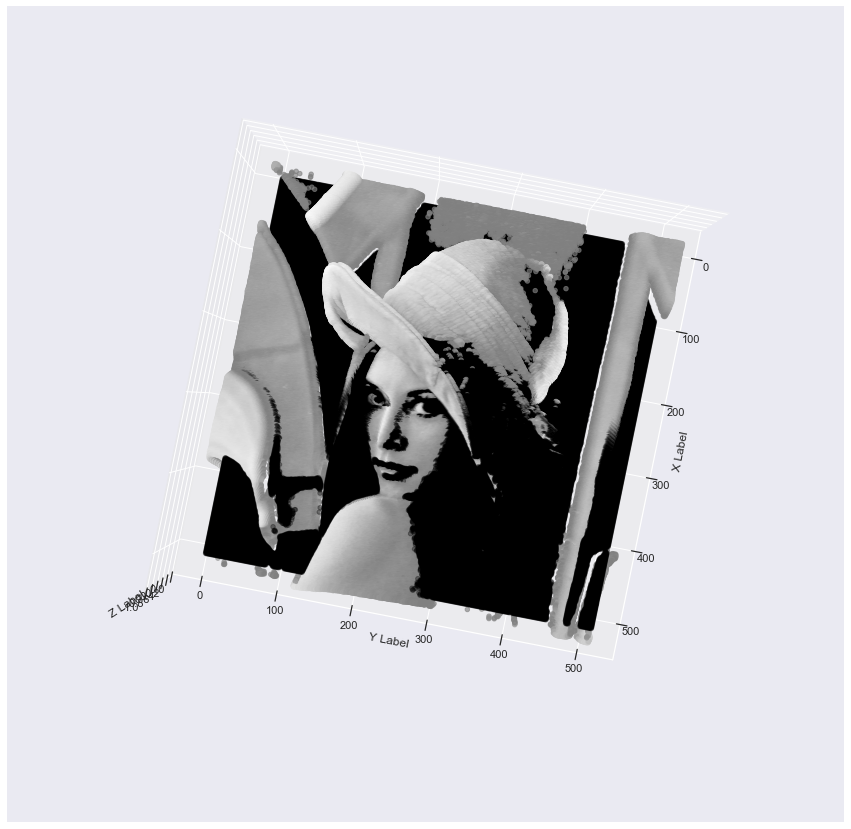

In [232]:
plot_bin_image(2)

---
## Q1-3-2
#### Partition image intensity into 3. 4, 5, 6, 7 bins to check image quality change compared with the original Lena image 


Number of bins: 3


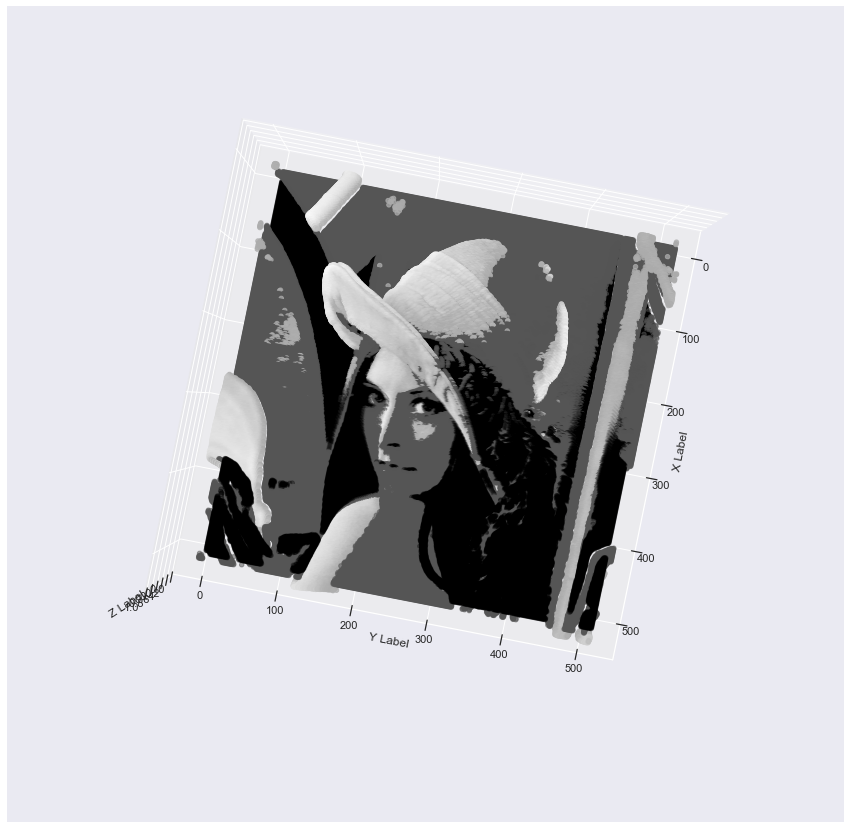

Number of bins: 4


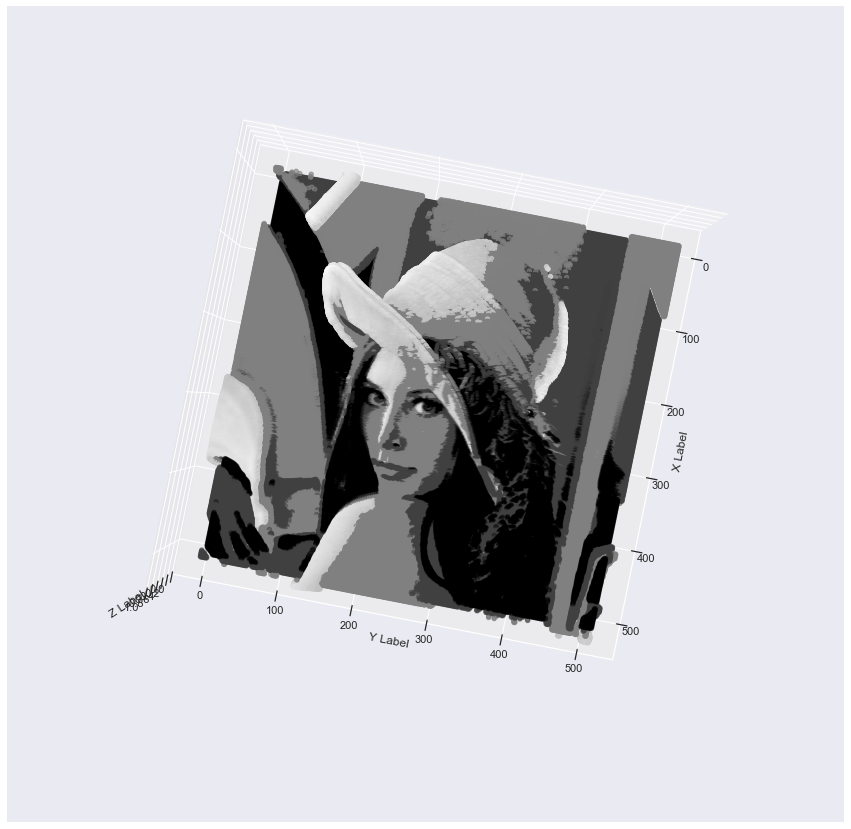

Number of bins: 5


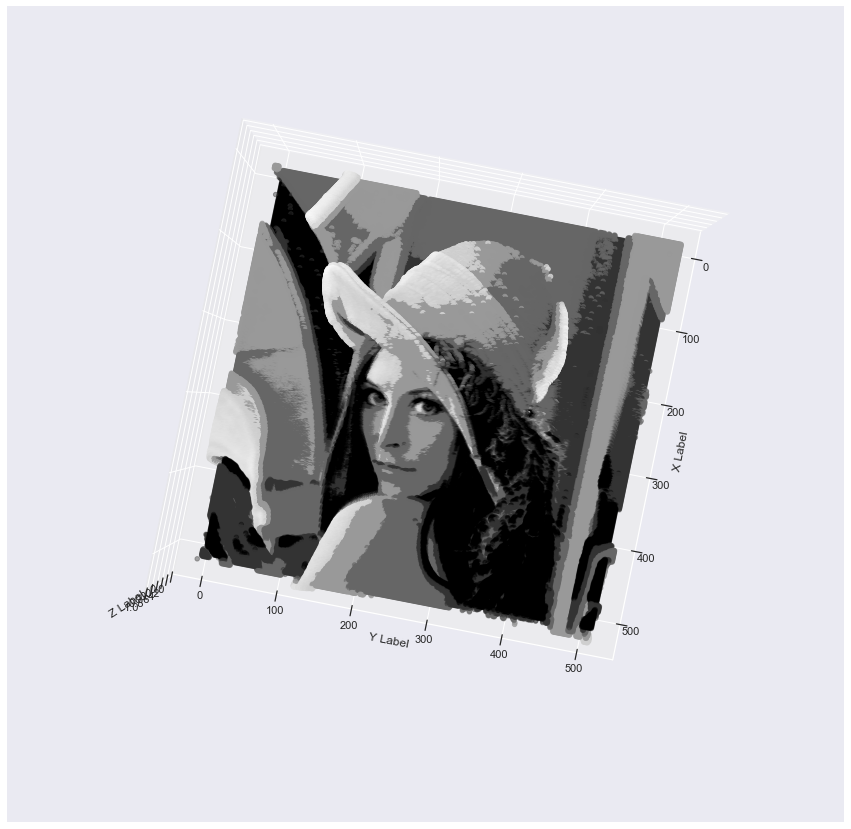

Number of bins: 6


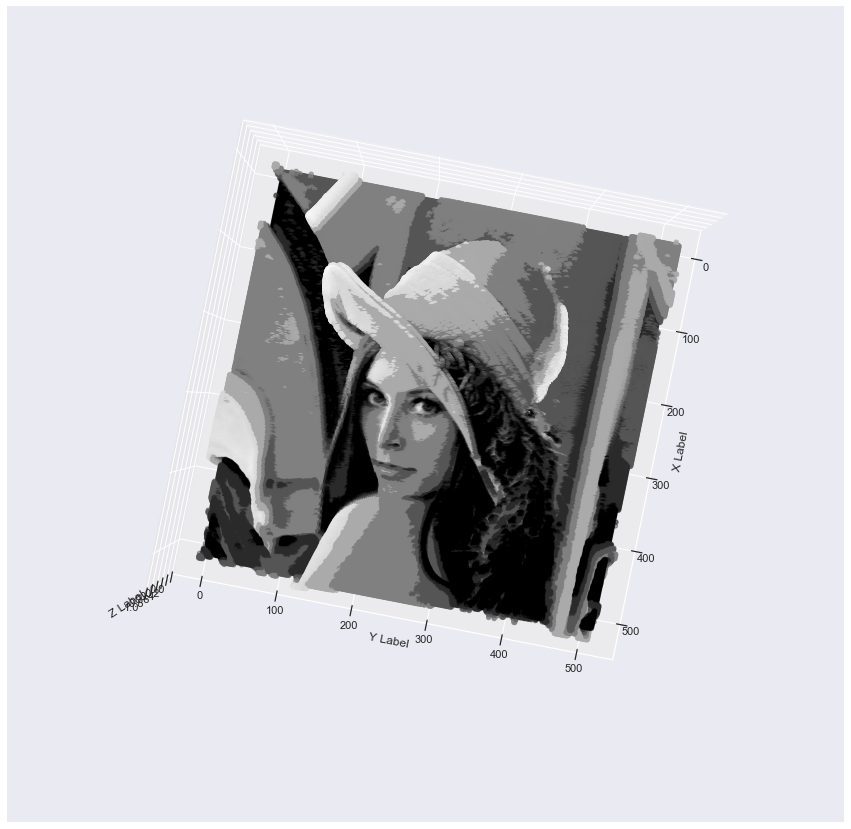

Number of bins: 7


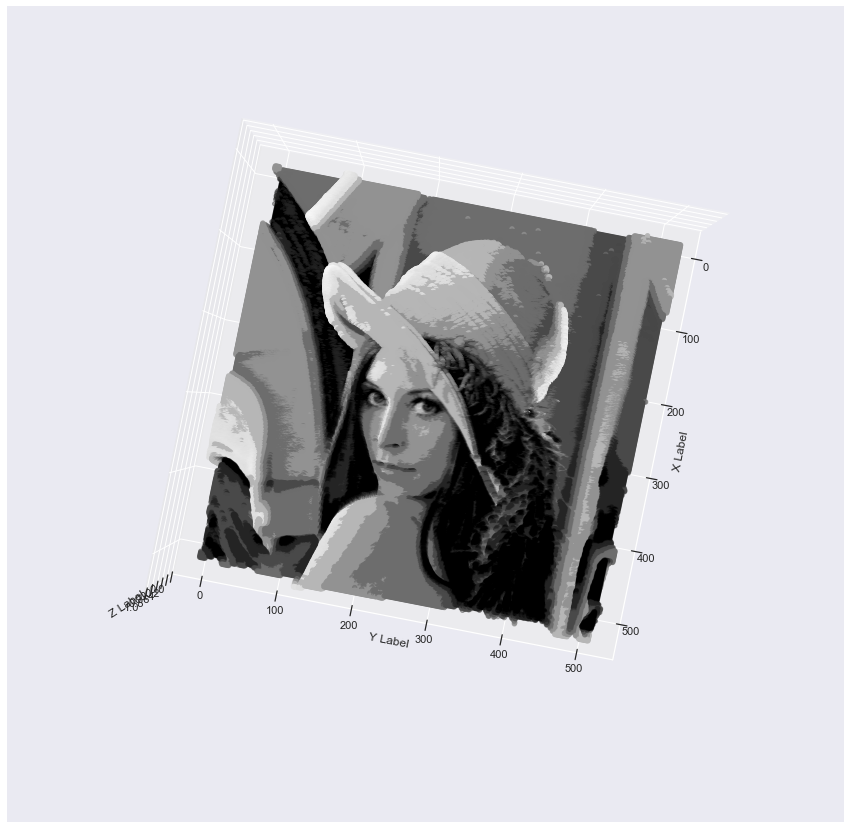

In [233]:
# plot 3, 4, 5, 6, 7bins:
plot_bin_image(3)
plot_bin_image(4)
plot_bin_image(5)
plot_bin_image(6)
plot_bin_image(7)


Number of bins: 255


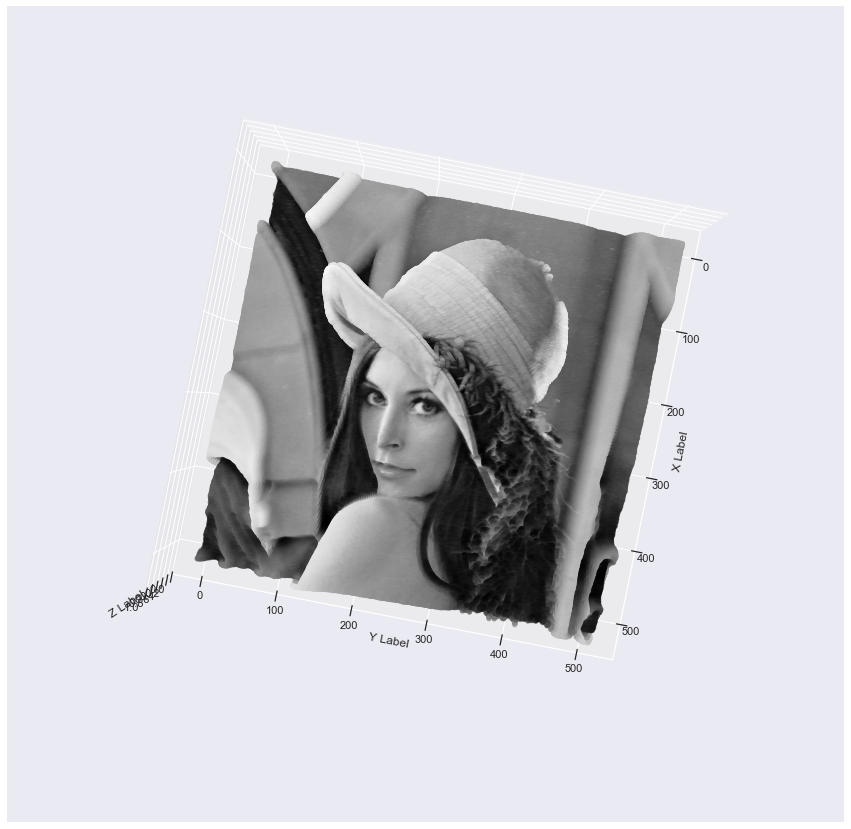

In [235]:
import warnings
# Ignore system warnings
warnings.filterwarnings('ignore')

plot_bin_image(255)

##### As we can see, as the number of bins increase, the image will become more and more clear.